In [118]:
import matplotlib.pyplot as plt
import random

In [119]:
def collusion_scenario(p, epsilon, time_steps=1000, gas_target=15000000, init_bf=100, txn_fee=101, d=8):
    
    block_sizes = [gas_target]
    mempool = gas_target
    revenue = [0]
    mem_overfilled = mempool > 2 * gas_target
    base_fee = [init_bf]
    colluding_num = 0
    colluder_revenue = [0]
    myopic_revenue = [0]
    
    
    for i in range(time_steps - 1):
        colluding = random.random() < p
        if colluding:
            mined_amount = gas_target - epsilon
            colluding_num += 1
        else:
            mined_amount = (2 * gas_target) if mem_overfilled else mempool
        
        mempool -= mined_amount
        new_basefee = basefee(base_fee[i], mined_amount, gas_target, d)
        base_fee.append(new_basefee)
        block_sizes.append(mined_amount)
        block_revenue = ((txn_fee + i) - new_basefee) * mined_amount
        
        revenue.append(block_revenue) 
        
        if colluding:
            colluder_revenue.append(block_revenue)
        else:
            myopic_revenue.append(block_revenue)
            
        mempool += gas_target
     
    data = {
        "Basefee" : base_fee,
        "Block Sizes" : block_sizes,
        "Overall Revenues" : revenue,
        "Myopic Revenues" : myopic_revenue,
        "Colluder Revenues" : colluder_revenue,
    }
    
    return data

def basefee(previous, mined_amount, gas_target, d): 
    
    return previous*(1+1/d*((mined_amount-gas_target)/gas_target))
    

In [120]:
sim = collusion_scenario(.25, 1500000, 1000)
controll_sim = collusion_scenario(0, 1500000, 1000)

print("Myopic Revenue Under No Collusion:", sum(controll_sim["Overall Revenues"]))
print("Myopic Revenue:", sum(sim["Myopic Revenues"]))
print("Colluder Revenues:", sum(sim["Colluder Revenues"]))
print("Colluder - Myopic:", sum(sim["Colluder Revenues"]) - sum(sim["Myopic Revenues"]))

Myopic Revenue Under No Collusion: 7492500000000.0
Myopic Revenue: 5912468309770.527
Colluder Revenues: 1618207299192.6619
Colluder - Myopic: -4294261010577.865


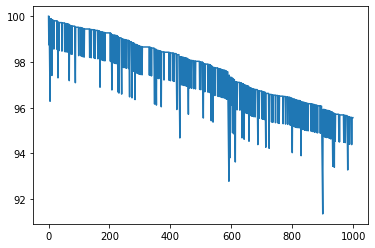

In [121]:
plt.plot(sim["Basefee"])

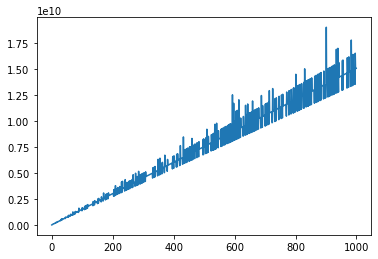

In [122]:
plt.plot(sim["Overall Revenues"])

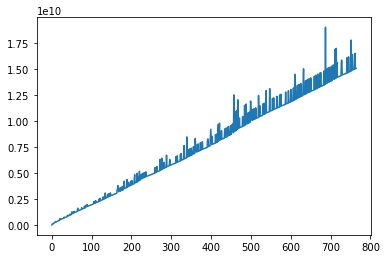

In [123]:
plt.plot(sim["Myopic Revenues"])

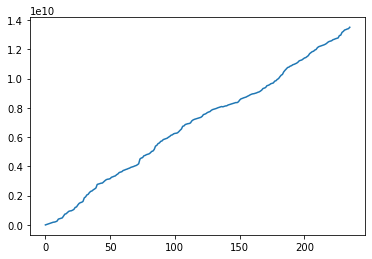

In [124]:
plt.plot(sim["Colluder Revenues"])